In [17]:
import pandas as pd
from load_data import load_data
from col_list import col_list
from clean_data import clean_data
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import itertools

dir = '~/DSI/covid-symptom-searches/data/'
nrows= 100000
usecols = col_list()

hospital, searches, index = load_data(dir,nrows,usecols)
df = clean_data(searches,hospital)

In [13]:
hospital_cols_kd = list(hospital.columns) # Columns for hospital data, including key/date
hospital_cols = hospital_cols_kd[2:] # Columns for hospital data, excluding key/date
searches_cols_kd = list(searches.columns)
searches_cols = searches_cols_kd[2:]
# print(hospital_cols)
# print(searches_cols)

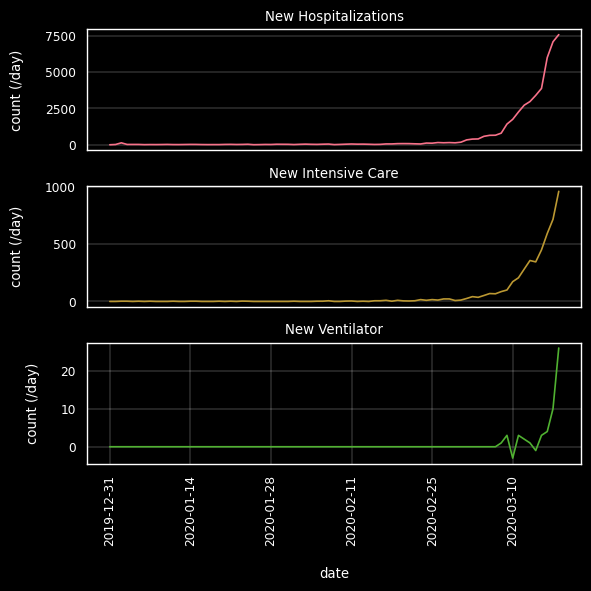

In [14]:
# hospital_by_date = df[['date'] + hospital_cols].groupby('date').sum()

ys = ["new_hospitalized",'new_intensive_care','new_ventilator']
ylabels = ['New Hospitalizations','New Intensive Care', 'New Ventilator']

hospital_by_date.rename(columns=dict(zip(ys, ylabels)), inplace=True)

fig = plt.figure(figsize=(6,6))

matplotlib.rcParams.update(matplotlib.rcParamsDefault)

sns.set(font_scale = .7)
plt.style.use("dark_background")
sns.set_context("paper")

matplotlib.rcParams.update({'grid.linewidth': .2})

palette = itertools.cycle(sns.color_palette("husl"))

for i in range(len(ys)):
    ax = plt.subplot(3,1,i+1)
    g = sns.lineplot(x = "date", y = ylabels[i], 
                data = hospital_by_date,
                color=next(palette))
    plt.xticks(rotation=90)

    xtick_range = range(0,len(hospital_by_date.index),14)
    ax.set_title(ylabels[i])
    if i == len(ys)-1:
        ax.set_xticks(xtick_range) # <--- set the ticks first
        ax.set_xlabel('date', labelpad=15)
    else:
        ax.set_xticks([])
        ax.set_xlabel('')
        
    ax.set_ylabel('count (/day)', labelpad=15)

fig.tight_layout()
plt.show()

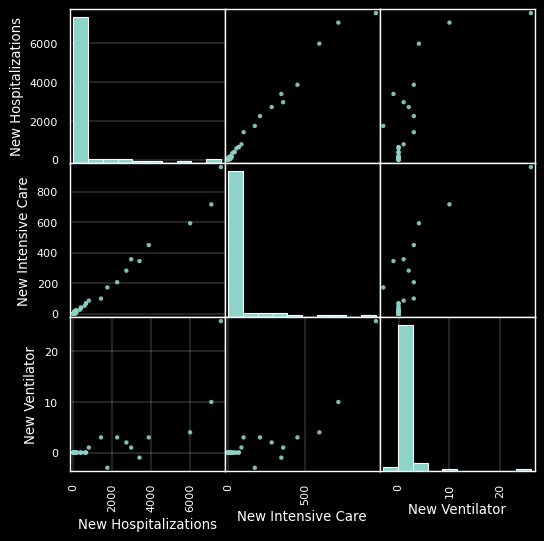

In [15]:
pd.plotting.scatter_matrix(hospital_by_date.loc[:,ylabels],
s=40,figsize=(6,6),alpha=0.9);

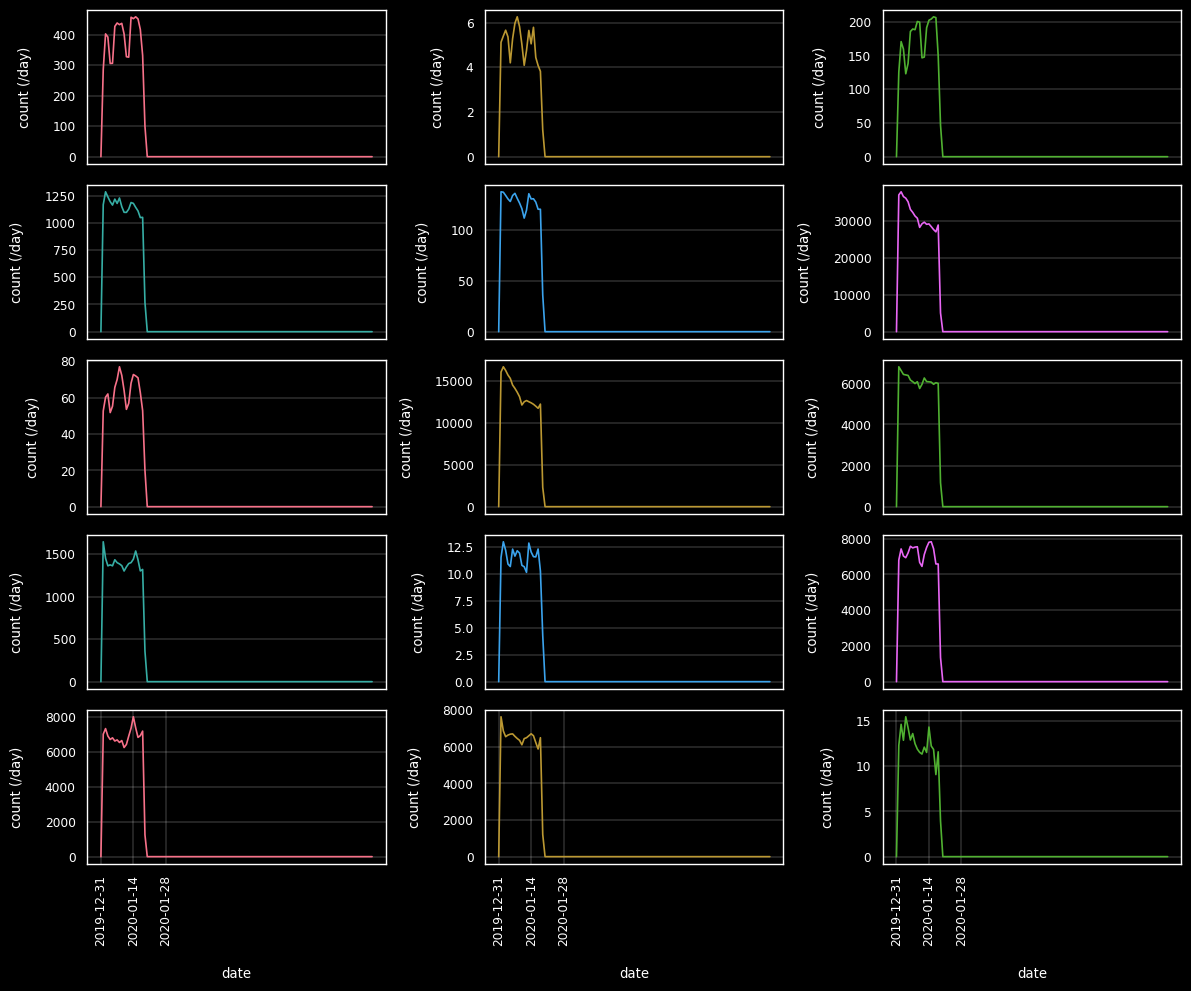

In [19]:
# searches_by_date = df[['date'] + searches_cols].groupby('date').sum()

ylabels = list(searches_by_date.columns[1:])

fig = plt.figure(figsize=(12,10))

matplotlib.rcParams.update(matplotlib.rcParamsDefault)

sns.set(font_scale = .7)
plt.style.use("dark_background")
sns.set_context("paper")

matplotlib.rcParams.update({'grid.linewidth': .2})

palette = itertools.cycle(sns.color_palette("husl"))

for i in range(15):
    ax = plt.subplot(5,3,i+1)
    g = sns.lineplot(x = "date", y = ylabels[i],
                data = searches_by_date,
                color=next(palette))
    plt.xticks(rotation=90)

    xtick_range = range(0,int(len(searches_by_date.index)/4),14)
    ax.set_xlim()
    # ax.set_title(ylabels[i])
    if i > 11:
        ax.set_xticks(xtick_range) # <--- set the ticks first
        ax.set_xlabel('date', labelpad=15)
    else:
        ax.set_xticks([])
        ax.set_xlabel('')
        
    ax.set_ylabel('count (/day)', labelpad=15)

fig.tight_layout()
plt.show()